In [2]:
import matplotlib.pylab as plt
import numpy as np

In [34]:
def plot_loss(loss_func, x_vals):

    # Plot the function
    y_vals = [loss_func(x) for x in x_vals]
    y_min = min(y_vals)
    x_min = x_vals[np.argmin(y_vals)]

    plt.plot(x_vals, y_vals, label='Unimodal Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.xticks([x_min])
    plt.yticks([y_min])
    plt.title('Custom Unimodal Function')


def plot_points_with_arrows(a, b):
    plt.figure(figsize=(8, 6))
    
    # Plot the points
    plt.scatter(a, b, color='blue', zorder=5)
    
    # Draw arrows between points
    for i in range(len(a) - 1):
        if a[i+1] > a[i]:
            # forward
            color = 'red'
        else:
            color = 'green'
        plt.arrow(a[i], b[i], a[i+1] - a[i], b[i+1] - b[i],
                  head_width=0.05, head_length=0.05, fc=color, ec=color)
    
    # Plot the last point to ensure it is visible
    plt.scatter(a[-1], b[-1], color='blue', zorder=5)
    
    plt.xlabel('loss')
    plt.ylabel('s')
    plt.title('Evaluated min points')
    plt.grid(True)


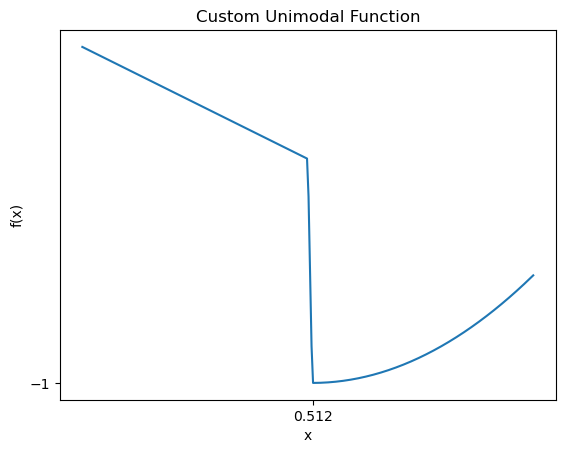

In [32]:
# loss_func = lambda x: (x)**5 - (x)**3 - (x-0.4)**2 + 0.3
def loss_func(x):
    # Define the pieces of the piecewise function
    if x < 0.5:
        return 2 - 2*x  # Quadratic function passing through (0, 2) and (0.5, 1)
    if x > 0.5 and x < 0.51 or x==0.5 or x==0.51:
        return 1 - 200*(x-0.5)
    else:
        return 4 * (x - 0.51)**2 - 1  # Quadratic function passing through (0.51, -1) and (1, 0)

plot_loss(loss_func, np.linspace(0, 1, 300))

In [23]:
def binary_local_minimum_search( loss_func= lambda x:(x-1.697)**2, threshold=1e-4, a=0, b=2, max_eval=10):
    evaluated_points = {}
    delta_loss = float('inf')
    def eval_func_at_points(eval_points):
        eval_values = []
        for point in eval_points:
            if point in evaluated_points.keys():
                val = evaluated_points[point]
            else:
                val = loss_func(point)
                evaluated_points[point] = val
            eval_values.append(val)   
        min_val = min(eval_values)
        min_point = eval_points[np.argmin(eval_values)]
        return min_val, min_point
    
    grid = (b-a)/2
    eval_points = [a, a+grid, b]
    min_val, min_point = eval_func_at_points(eval_points)
    eval_count = len(evaluated_points)
    # decide initial scenario
    if min_point == (a+b)/2:
        scenario = 1
        grid /= 2
    else:
        scenario = 0
        direction_is_left = (min_point == eval_points[0])
        
    while eval_count < max_eval and delta_loss > threshold:
        loss_0 = min(list(evaluated_points.values()))
        # scenario A
        if scenario == 1:
            eval_points = [min_point-grid, min_point+grid]
            print("Enter scenario A with", eval_points[0], min_point, eval_points[-1])
            min_val_A, min_point_A = eval_func_at_points(eval_points)
            eval_count = len(evaluated_points)
            if min_val_A > min_val:
                # center remains minimum point, continue in scenario A
                grid /= 2
                continue
            else:
                # minimum found at edge
                delta_loss = loss_0 - min(list(evaluated_points.values()))
                direction_is_left = (min_point_A < min_point)
                min_point = min_point_A
                min_val = min_val_A
                scenario = 0
        # scenario B
        else:
            str = "left" if direction_is_left else "right"
            print(f"Enter scenario B with {str} edge {min_point}")
            new_point = min_point - grid if direction_is_left else min_point + grid
            print(f"New point {new_point} to the {str}")
            new_point = max(0, new_point)
            loss_eval_new, _ = eval_func_at_points([new_point])
            eval_count = len(evaluated_points)
            if loss_eval_new < min_val:
                delta_loss = loss_0 - min(list(evaluated_points.values()))
                # minimum at new point, continue in B
                min_point, min_val = new_point, loss_eval_new
                continue
            else:
                # minimum at previous point, go to A
                grid /= 2
                scenario = 1
    print(delta_loss, eval_count)
    return min_point, min_val, evaluated_points

In [26]:
min_point, min_val, evaluated_points = binary_local_minimum_search(loss_func, a = 0, b=1, max_eval =10)
print(f"min_point {min_point}, min_val {min_val}")

Enter scenario B with right edge 1
New point 1.5 to the right
Enter scenario A with 0.75 1 1.25
Enter scenario B with left edge 0.75
New point 0.5 to the left
Enter scenario A with 0.625 0.75 0.875
Enter scenario B with left edge 0.625
New point 0.5 to the left
Enter scenario A with 0.5625 0.625 0.6875
0.041874999999999996 10
min_point 0.5625, min_val -0.988975


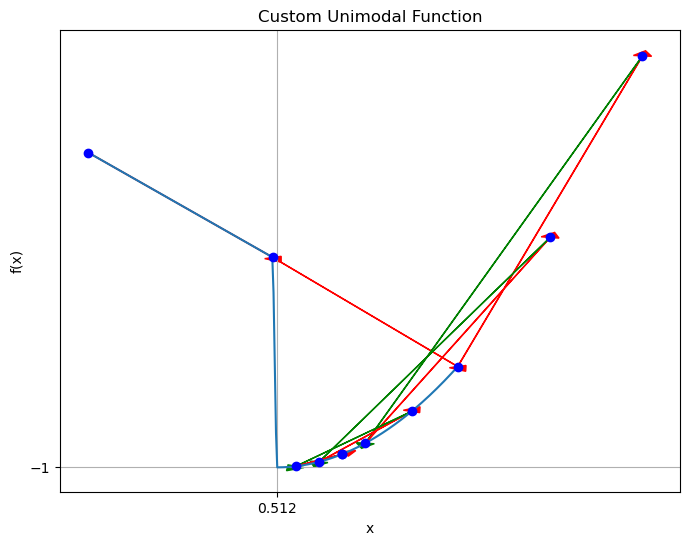

In [35]:
evaluated_points_sorted = dict(sorted(evaluated_points.items()))
plot_points_with_arrows(list(evaluated_points.keys()), list(evaluated_points.values()))
plot_loss(loss_func, np.linspace(0, 1, 300))

In [72]:
def discrete_gradient_descent( loss_func= lambda x:(x-1.697)**2, threshold=1e-4, a=0, b=2, max_eval=10):
    evaluated_points = {}
    eval_count = {}
    delta_loss = float('inf')

    def eval_func_at_points(eval_points):
        eval_values = []
        for point in eval_points:
            if point in evaluated_points.keys():
                val = evaluated_points[point]
            else:
                val = loss_func(point)
                evaluated_points[point] = val
            eval_values.append(val)   
        min_val = min(eval_values)
        min_point = eval_points[np.argmin(eval_values)]
        eval_count["eval_count"] = len(evaluated_points)
        return min_val, min_point
    
    grid = (b-a)/2
    eval_points = [a, a+grid, b]
    min_val, min_point = eval_func_at_points(eval_points)

    eval_vals = list(evaluated_points.values())
    loss_0 = min(eval_vals) 
        
    while True:
        eval_vals = list(evaluated_points.values())
        loss_0 = min(eval_vals) 
        ind_min_val =  np.argmin(eval_vals)
        print( ind_min_val, eval_count["eval_count"], evaluated_points,ind_min_val != 0, ind_min_val != len(eval_vals)-1, (ind_min_val != 0 or ind_min_val != len(eval_vals)-1))

        if (ind_min_val != 0 and ind_min_val != len(eval_vals)-1):
            grid /=2    
            eval_points = [min_point-grid, min_point+grid]
            min_val, min_point = eval_func_at_points(eval_points)

            print("Enter scenario A with", eval_points[0], min_point, eval_points[-1])

        else: 
            if ind_min_val == 0:
                _,_ = eval_func_at_points([list(evaluated_points.keys())[list(evaluated_points.values())] - grid])
            else:
                _,_ = eval_func_at_points([list(evaluated_points.keys())[list(evaluated_points.values())] + grid])


        
        eval_vals = list(evaluated_points.values())
        loss_0 = min(eval_vals) 
        ind_min_val =  np.argmin(eval_vals)
        delta_loss = min([abs(loss_0 - v) for i,v in enumerate(eval_vals) if i != ind_min_val])  

        if eval_count["eval_count"] > max_eval:
            exit_criterion = "max_evals"
            break
        if delta_loss < threshold: 
            exit_criterion = "tolerance achieved"
            break 
        
    print(delta_loss, eval_count, exit_criterion)
    return min_point, min_val, evaluated_points

In [73]:
min_point, min_val, evaluated_points = discrete_gradient_descent(loss_func, a = 0, b=0.5, max_eval =31, threshold=1e-5)
print(f"min_point {min_point}, min_val {min_val}")
evaluated_points_sorted = dict(sorted(evaluated_points.items()))
plot_points_with_arrows(list(evaluated_points.keys()), list(evaluated_points.values()))
plot_loss(loss_func, np.linspace(0, 1, 300))

2 3 {0: 2, 0.25: 1.5, 0.5: 1.0} True False True
Enter B
Enter scenario B with right edge 0.5
New point 0.75 to the right
3 4 {0: 2, 0.25: 1.5, 0.5: 1.0, 0.75: -0.7696000000000001} True False True
Enter B
Enter scenario B with right edge 0.5
New point 0.75 to the right
3 4 {0: 2, 0.25: 1.5, 0.5: 1.0, 0.75: -0.7696000000000001} True False True
Enter B
Enter scenario B with right edge 0.5
New point 0.75 to the right
3 4 {0: 2, 0.25: 1.5, 0.5: 1.0, 0.75: -0.7696000000000001} True False True
Enter B
Enter scenario B with right edge 0.5
New point 0.75 to the right
3 4 {0: 2, 0.25: 1.5, 0.5: 1.0, 0.75: -0.7696000000000001} True False True
Enter B
Enter scenario B with right edge 0.5
New point 0.75 to the right
3 4 {0: 2, 0.25: 1.5, 0.5: 1.0, 0.75: -0.7696000000000001} True False True
Enter B
Enter scenario B with right edge 0.5
New point 0.75 to the right
3 4 {0: 2, 0.25: 1.5, 0.5: 1.0, 0.75: -0.7696000000000001} True False True
Enter B
Enter scenario B with right edge 0.5
New point 0.75 to t

KeyboardInterrupt: 